In [106]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("dark")
%matplotlib inline 

In [27]:
data = pd.read_csv('ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<AxesSubplot:xlabel='population', ylabel='profit'>

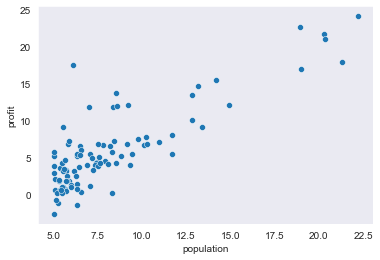

In [107]:
sns.scatterplot(x='population',y='profit',data=data)

In [28]:
#给data添加都是1的那一列
ones = pd.DataFrame({'ones':np.ones(len(data))})
data =pd.concat([ones,data],axis=1)


In [69]:
X=data.values[:,:2]
y=data.values[:,-1]
X.shape

(97, 2)

In [70]:
#定义梯度下降的初始量
theta = np.zeros(X.shape[1])
iterations = 1500
alpha = 0.01
theta

array([0., 0.])

In [83]:
#定义损失函数
def costfunction(theta,X,y):
    m=X.shape[0]
    error = np.dot(X,theta) -y  #error函数
    return sum(error**2)/(2*m)# 平方损失函数
costfunction(theta,X,y)

32.072733877455654

In [102]:
#梯度下降
def gradient(theta, X, y):
    m=X.shape[0]
    error = np.dot(X,theta) -y #error函数

    return error.T.dot(X)/m


In [100]:
def batch_gradient_decent(theta, X, y, itera, alpha):
    # itera 循环遍数
    cost_list = [costfunction(theta,X,y)]
    _theta = theta.copy()
    
    for i in range(itera):
        _theta = _theta - alpha * gradient(_theta,X,y)
        cost=costfunction(_theta,X,y)
        cost_list.append(cost)
    return _theta,cost_list

In [105]:
fina_theta,cost_list = batch_gradient_decent(theta,X,y,1500,alpha)
fina_theta
cost_list

[32.072733877455654,
 6.737190464870012,
 5.931593568604957,
 5.901154707081387,
 5.895228586444221,
 5.890094943117332,
 5.885004158443644,
 5.879932480491416,
 5.8748790947625755,
 5.869843911806386,
 5.8648268653129305,
 5.859827889932179,
 5.85484692057229,
 5.849883892376585,
 5.844938740722034,
 5.840011401218365,
 5.835101809707229,
 5.830209902261389,
 5.825335615183866,
 5.820478885007099,
 5.8156396484921515,
 5.81081784262787,
 5.806013404630042,
 5.801226271940628,
 5.7964563822269,
 5.791703673380652,
 5.786968083517396,
 5.782249550975539,
 5.777548014315599,
 5.772863412319381,
 5.768195683989214,
 5.763544768547119,
 5.758910605434049,
 5.7542931343090755,
 5.7496922950486296,
 5.745108027745686,
 5.740540272709012,
 5.735988970462384,
 5.731454061743794,
 5.726935487504702,
 5.722433188909259,
 5.717947107333528,
 5.7134771843647485,
 5.709023361800548,
 5.704585581648199,
 5.700163786123851,
 5.695757917651815,
 5.691367918863748,
 5.6869937325979825,
 5.6826353018987

<AxesSubplot:>

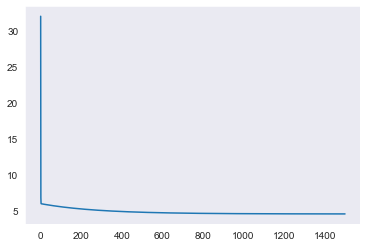

In [115]:
# 查看变化的cost function 
sns.lineplot(x=range(len(cost_list)),y=cost_list)

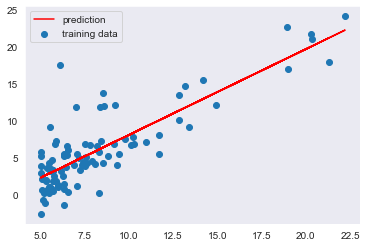

In [129]:
plt.scatter(data.population,data.profit,label = 'training data')
plt.plot(data.population,fina_theta[0] + data.population * fina_theta[1],c='red',label = 'prediction')
plt.legend()


In [178]:
#选修部分
data2 =pd.read_csv('ex1data2.txt',names=['square', 'bedrooms', 'price' ])
data2.head()
ones=pd.DataFrame({'ones':np.ones(len(data2))})
data2 = pd.concat([ones,data2],1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ones      47 non-null     float64
 1   square    47 non-null     int64  
 2   bedrooms  47 non-null     int64  
 3   price     47 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [167]:
#Feature Normalization

def normalization(data):

    return data.apply(lambda x: (x - x.mean()) / x.std())


In [179]:
data2.iloc[:,1:]=normalization(data2.iloc[:,1:])

In [182]:
X=data2.values[:,:3]
y=data2.values[:,-1]
X

array([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
       [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
       [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
       [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
       [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
       [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
       [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
       [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
       [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
       [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
       [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
       [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
       [ 1.00000000e+00, -8.56523009e-01

<AxesSubplot:>

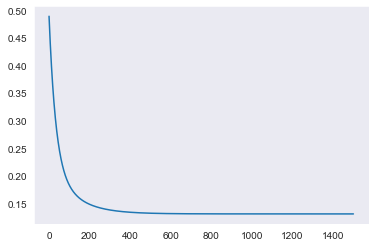

In [188]:
theta = np.zeros(X.shape[1])
opt_theta , cost_list= batch_gradient_decent(theta,X,y,1500,alpha)
sns.lineplot(x=range(len(cost_list)),y=cost_list)

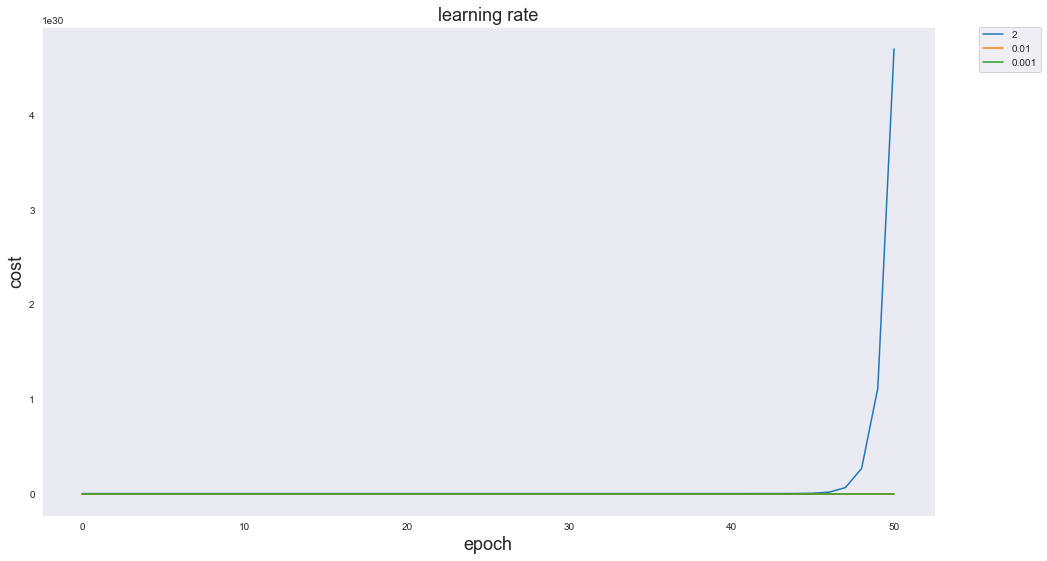

In [195]:
epoch=50
candidate=[2,0.01,0.001]
fig, ax = plt.subplots(figsize=(16, 9))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show() 